In [466]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Implementing all given functions

In [467]:
def mean_squared_error(Y_true, Y_pred):
  assert(len(Y_true) == len(Y_pred))
  squared_error = 0
  for i in range(len(Y_true)):
    squared_error += (Y_true[i] - Y_pred[i])**2
  mean_squared_error = (squared_error / len(Y_true))
  return mean_squared_error

In [ ]:
def fit_linear_regression(X, y):
  A = np.zeros(X.shape[1])
  b = 0
  learning_rate = 0.0001
  epochs = 1000
  clip_value = 1e300
  delta = 0
  for i in range(epochs):
    y_pred = np.dot(X,A) + b

    delta_A = 2/len(y) * np.dot(X.T, y_pred - y);
    delta_b= 2/len(y) * np.sum(y_pred - y);

    #clipping to avoid exploding to infinity
    delta_A = np.clip(delta_A, -clip_value, clip_value)
    delta_b = np.clip(delta_b, -clip_value, clip_value)

    A = A - learning_rate * delta_A
    b = b - learning_rate * delta_b

  return (A, b)

In [469]:
def predict(X, weights):
  A, b = weights
  y_pred = np.dot(X, A) + b
  return y_pred

In [470]:
def plot_preds(X, Y_true, Y_pred):
  plt.scatter(X, Y_true, color='green')
  plt.scatter(X, Y_pred, color='red')
  plt.show()

In [471]:
def normalize_features(X):
  mean = np.mean(X, axis = 0);
  std_dev = np.std(X, axis = 0);
  X_norm = (X - mean) / std_dev
  return X_norm

## Running Linear Regression

The following codes are directly taken from sample.py given in the google drive link with datasets

In [472]:
# Load the train data
train_data = pd.read_csv("train.csv")

X_train = train_data[
    ["carlength", "carwidth", "carheight", "horsepower", "peakrpm"]
].values
y_train = train_data["price"].values

test_data = pd.read_csv("test.csv")

X_test = test_data[
    ["carlength", "carwidth", "carheight", "horsepower", "peakrpm"]
].values
y_test = test_data["price"].values

Mean Squared Error on Test Set: inf


C:\Users\Hp\AppData\Local\Temp\ipykernel_7508\3879960338.py:5: RuntimeWarning: overflow encountered in scalar power
  squared_error += (Y_true[i] - Y_pred[i])**2


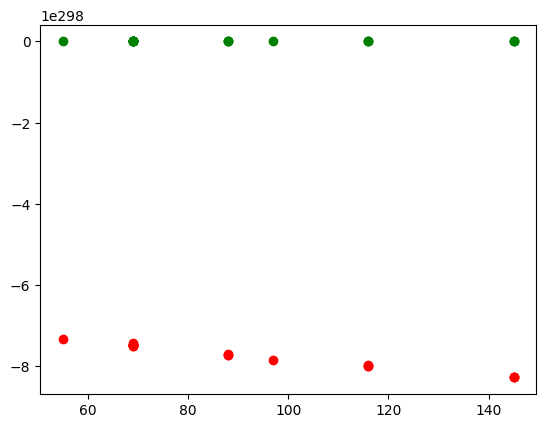

In [473]:
############# Without normailzed features ################
weights = fit_linear_regression(X_train, y_train)

y_pred = predict(X_test, weights)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

plot_preds(test_data["horsepower"].values, y_test, y_pred)


Mean Squared Error on Test Set: 40503395.42835841


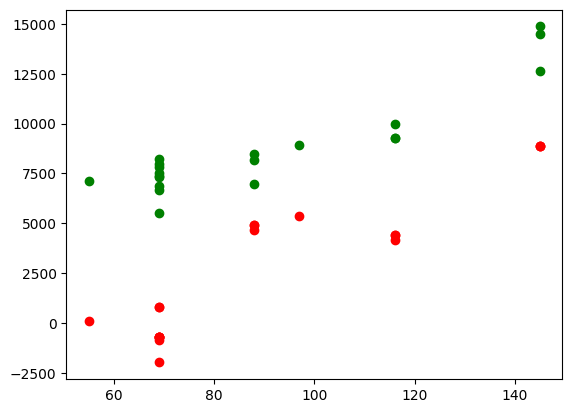

In [474]:
################### Normalize features ######################
X_train = normalize_features(X_train)

weights = fit_linear_regression(X_train, y_train)
X_test = normalize_features(X_test)

y_pred = predict(X_test, weights)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

plot_preds(test_data["horsepower"].values, y_test, y_pred)